In [1]:

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
from IPython.display import display
%matplotlib inline
plt.style.use('ggplot')

# Importing data and modifying column name


In [3]:
df = pd.read_csv('/kaggle/input/youtube-revenue-prediction/sheet1.csv')
df.head()

,id,a,b,c,d,e,f,g,h,i,...,n,o,p,q,r,s,t,u,v,target
0,1,15-01-2021,1.5570,27337.8060,17558,4.88,424741,424745.88,101,105,...,443,940,30.63,0.0,0.0,356,27337,1530.0084,00:03:21,5.785
1,2,24-07-2019,1.2616,1553.0296,1231,5.64,21688,21693.64,1,4,...,14,31,27.86,0.0,0.0,8,1553,60.2926,00:02:19,0.826
2,3,09-08-2020,1.8000,4563.0000,2535,6.15,57690,57696.15,27,30,...,162,232,25.98,0.0,0.0,103,4563,230.7383,00:03:02,1.201
3,4,12-06-2019,1.2996,2117.0484,1629,5.76,27800,27805.76,9,3,...,34,64,26.28,0.0,0.0,19,2117,100.3671,00:02:50,0.963
4,5,02-06-2021,2.4762,231408.3186,93453,4.26,4175116,4175120.26,464,417,...,2325,9126,33.26,0.0,0.0,1997,231404,17511.5046,00:04:32,59.635


In [4]:
col_map ={'a':'Date',
          'b':'Average_views_per_viewer',
          'c':'Engagement_score',
          'g':'Impression_score',
          'd':'Unique_viewers',
          'p':'Average_viewed',
          'i':'Shares',
          'j':'Likes_vs_dislike',
          'k':'Content_viewability',
          'f':'Impressions',
          'l':'Dislikes',
          'm':'Subscribers_lost',
          'n':'Subscribers_gained',
          'o':'Like',
          't':'Views',
          'r':'Videos_added',
          'q':'Videos_published', 
          's':'Subscribers',
          'e':'Click_rate',
          'h':'Comments',
          'u':'Watch_hours',
          'v':'Average_view_sec',
          'target':'Revenue'}
df = df.rename(columns=col_map)
df.head()



,id,Date,Average_views_per_viewer,Engagement_score,Unique_viewers,Click_rate,Impressions,Impression_score,Comments,Shares,...,Subscribers_gained,Like,Average_viewed,Videos_published,Videos_added,Subscribers,Views,Watch_hours,Average_view_sec,Revenue
0,1,15-01-2021,1.5570,27337.8060,17558,4.88,424741,424745.88,101,105,...,443,940,30.63,0.0,0.0,356,27337,1530.0084,00:03:21,5.785
1,2,24-07-2019,1.2616,1553.0296,1231,5.64,21688,21693.64,1,4,...,14,31,27.86,0.0,0.0,8,1553,60.2926,00:02:19,0.826
2,3,09-08-2020,1.8000,4563.0000,2535,6.15,57690,57696.15,27,30,...,162,232,25.98,0.0,0.0,103,4563,230.7383,00:03:02,1.201
3,4,12-06-2019,1.2996,2117.0484,1629,5.76,27800,27805.76,9,3,...,34,64,26.28,0.0,0.0,19,2117,100.3671,00:02:50,0.963
4,5,02-06-2021,2.4762,231408.3186,93453,4.26,4175116,4175120.26,464,417,...,2325,9126,33.26,0.0,0.0,1997,231404,17511.5046,00:04:32,59.635


In [5]:
df = df.drop(['Engagement_score', 
              'Impression_score', 
              'Subscribers_lost',
              'Subscribers_gained',
              'Videos_added',
              'id', 
              'Likes_vs_dislike', 
              'Content_viewability',
             ], axis=1)

In [6]:

df.shape
#df.columns
#df.head(2)


(69, 16)

# Exploratory Data Analysis (EDA)

In [7]:
df.select_dtypes(include=('object')).head(2)

,Date,Average_view_sec
0,15-01-2021,00:03:21
1,24-07-2019,00:02:19


In [8]:

df['Date'] = pd.to_datetime(df['Date'])
df['Average_view_sec'] = pd.to_timedelta(df['Average_view_sec']).dt.seconds


In [9]:
df.isna().sum().reset_index().style.highlight_min()

,index,0
0,Date,0
1,Average_views_per_viewer,0
2,Unique_viewers,0
3,Click_rate,0
4,Impressions,0
5,Comments,0
6,Shares,0
7,Dislikes,0
8,Like,0
9,Average_viewed,0


In [10]:
df.Videos_published.value_counts(dropna=False)

Videos_published
0.0    54
NaN     8
1.0     7
Name: count, dtype: int64

In [11]:

df.Videos_published = df.Videos_published.fillna(0.0, axis=0)
df.isna().sum().sum()

0

In [12]:
df.columns

Index(['Date', 'Average_views_per_viewer', 'Unique_viewers', 'Click_rate',
       'Impressions', 'Comments', 'Shares', 'Dislikes', 'Like',
       'Average_viewed', 'Videos_published', 'Subscribers', 'Views',
       'Watch_hours', 'Average_view_sec', 'Revenue'],
      dtype='object')

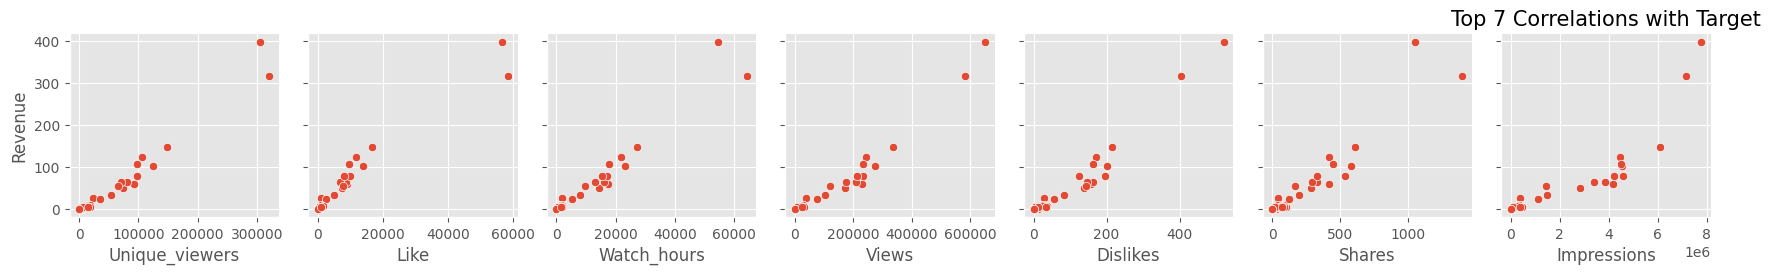

In [13]:
top_corr_name = df.corr()['Revenue'].sort_values(ascending=False).reset_index()['index'][:8].values
sns.pairplot(df[top_corr_name], x_vars=top_corr_name[1:], y_vars=top_corr_name[0])
plt.title('Top 7 Correlations with Target', fontsize=15)
plt.show()

> There are few extreme values


In [14]:
df['Watch_hours'].sort_values()


18        1.0297
63        1.6130
22        1.9916
27        3.4108
60        3.5756
         ...    
64    21847.0122
37    23105.5173
59    27336.0483
66    54463.2654
65    64133.8247
Name: Watch_hours, Length: 69, dtype: float64

In [15]:
df['Watch_hours'].mean()

5060.788681159419

In [16]:
df=df[df['Watch_hours']<=30000]

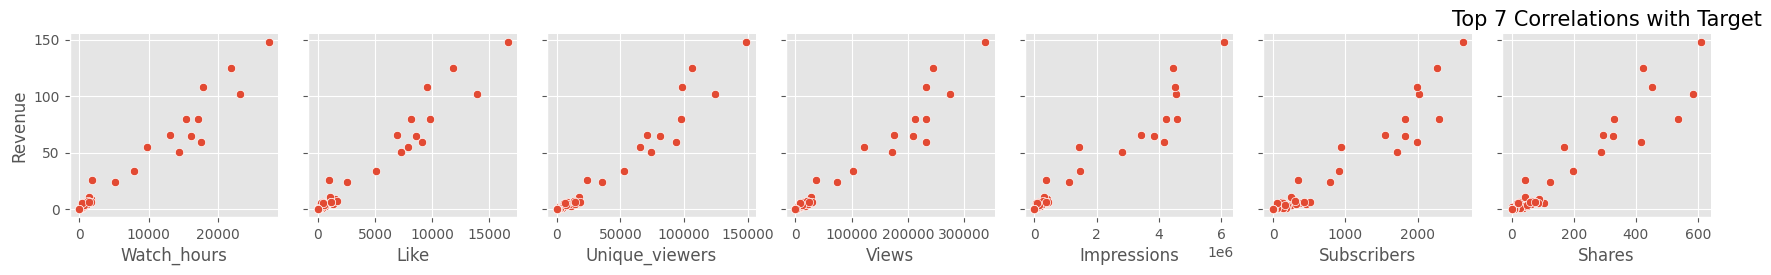

In [17]:
top_corr_name = df.corr()['Revenue'].sort_values(ascending=False).reset_index()['index'][:8].values
sns.pairplot(df[top_corr_name], x_vars=top_corr_name[1:], y_vars=top_corr_name[0])
plt.title('Top 7 Correlations with Target', fontsize=15)
plt.show()

In [18]:
df.shape

(67, 16)

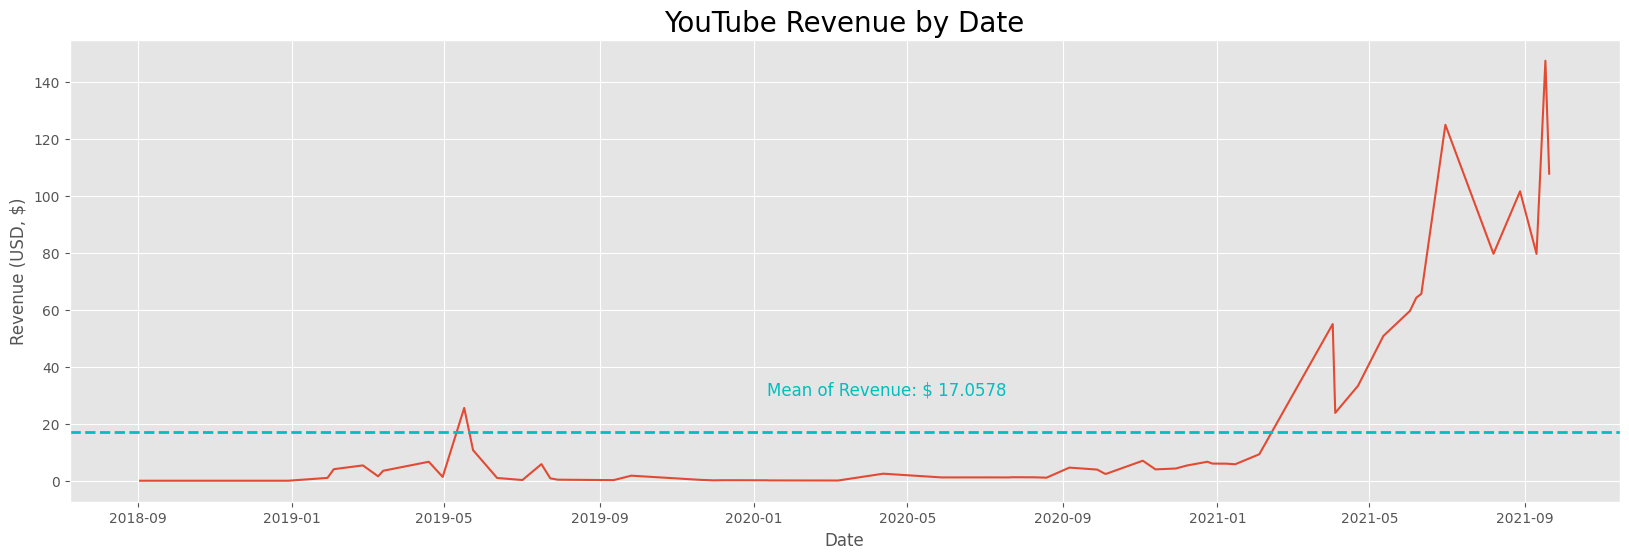

In [19]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=df, x='Date', y='Revenue')
plt.axhline(df.Revenue.mean(), color='c', linestyle='--', linewidth=2)
plt.annotate('Mean of Revenue: $ {}'.format(round(df.Revenue.mean(),4)), 
             (df.Date[20], 30), 
             fontsize=12, 
             color='c')
plt.title('YouTube Revenue by Date', fontsize=20)
plt.ylabel('Revenue (USD, $)')
plt.show()

In [20]:
df.corr()['Revenue'].sort_values(ascending=False).reset_index()[1:].style.bar(align='mid')
     

,index,Revenue
1,Watch_hours,0.980722
2,Like,0.978726
3,Unique_viewers,0.977583
4,Views,0.976164
5,Impressions,0.971108
6,Subscribers,0.959061
7,Shares,0.957932
8,Dislikes,0.953578
9,Comments,0.909540
10,Average_views_per_viewer,0.800271


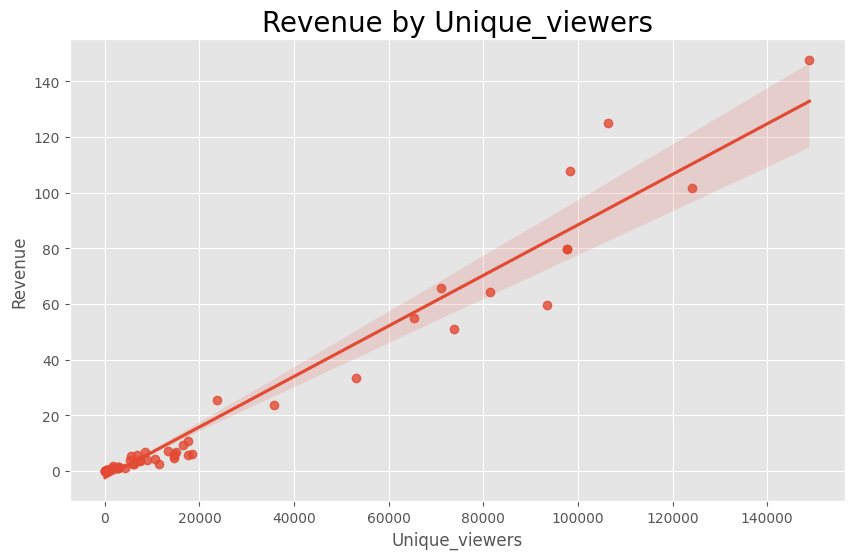

In [21]:
plt.figure(figsize=(10,6))
sns.regplot(data=df, x='Unique_viewers', y='Revenue')
plt.title('Revenue by Unique_viewers', fontsize=20)
plt.show()

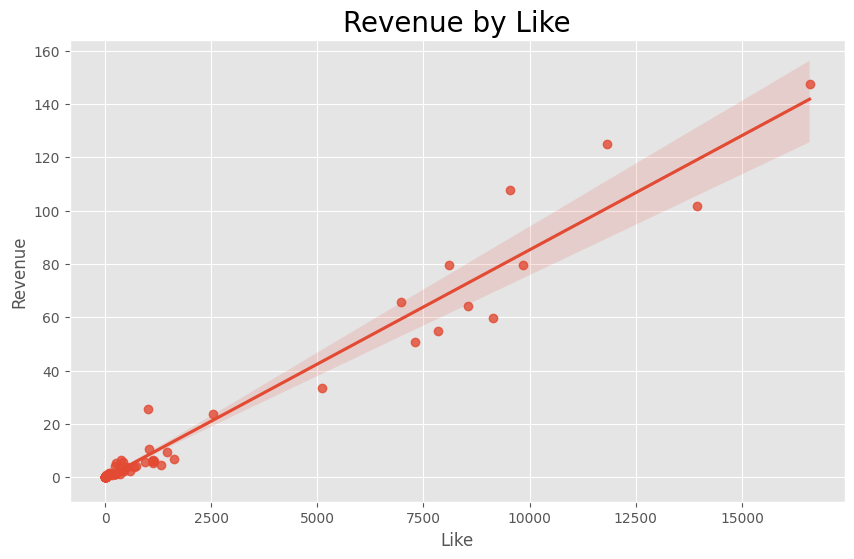

In [22]:
plt.figure(figsize=(10,6))
sns.regplot(data=df, x='Like', y='Revenue')
plt.title('Revenue by Like', fontsize=20)
plt.show()

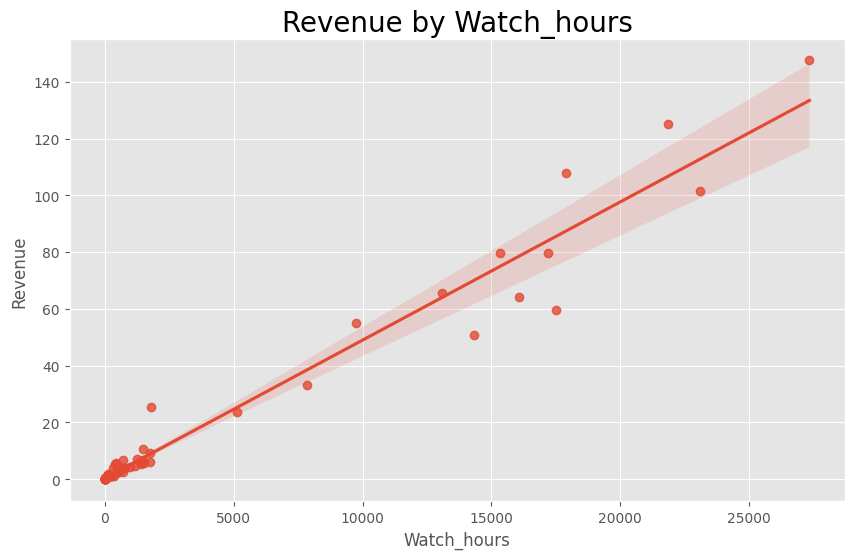

In [23]:
plt.figure(figsize=(10,6))
sns.regplot(data=df, x='Watch_hours', y='Revenue')
plt.title('Revenue by Watch_hours', fontsize=20)
plt.show()

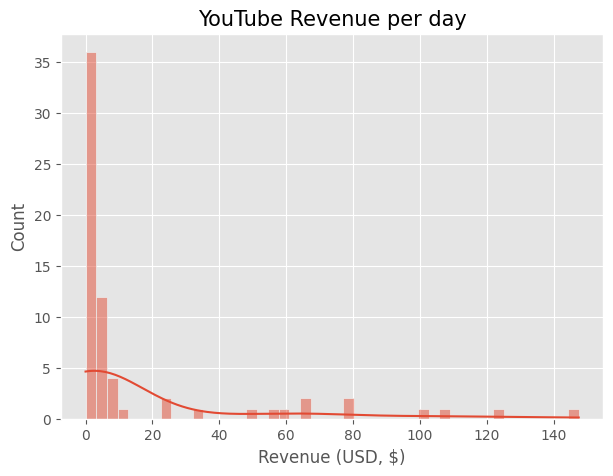

In [24]:
plt.figure(figsize=(7,5))
sns.histplot(df['Revenue'], kde=True)
plt.title('YouTube Revenue per day', fontsize=15)
plt.xlabel('Revenue (USD, $)')
plt.show()

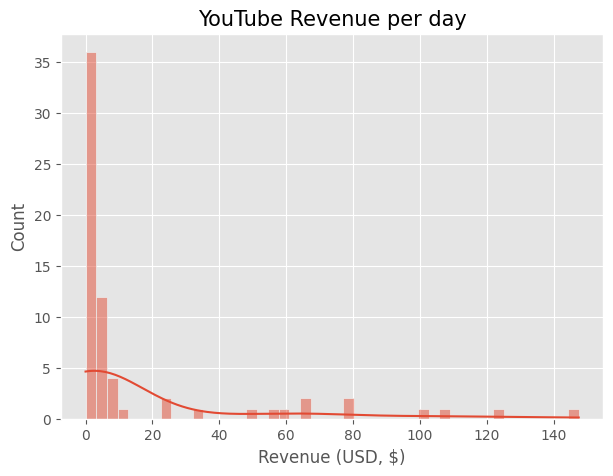

In [25]:
df = df[(df['Revenue'] <= 200)].reset_index(drop=True)
plt.figure(figsize=(7,5))
sns.histplot(df['Revenue'], kde=True)
plt.title('YouTube Revenue per day', fontsize=15)
plt.xlabel('Revenue (USD, $)')
plt.show()

In [26]:
df.shape

(67, 16)

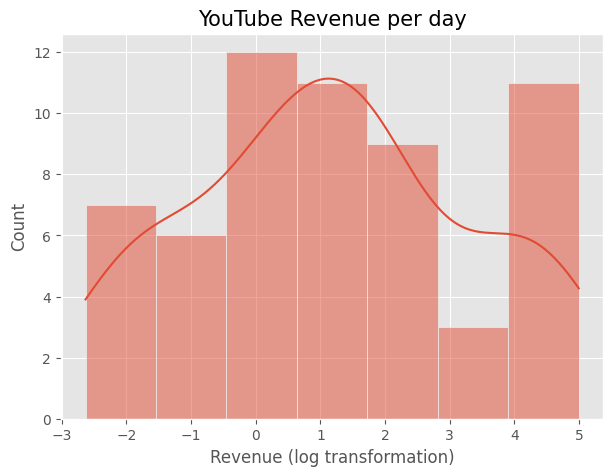

In [27]:
plt.figure(figsize=(7,5))
sns.histplot(np.log(df['Revenue']), kde=True)
plt.title('YouTube Revenue per day', fontsize=15)
plt.xlabel('Revenue (log transformation)')
plt.show()

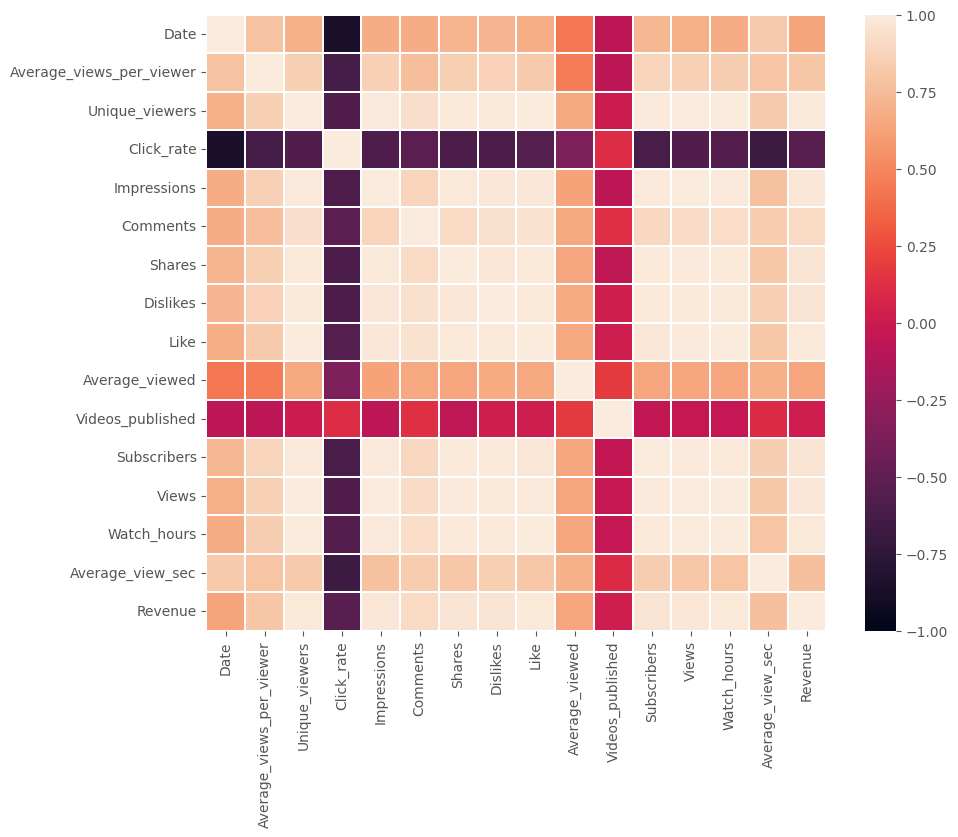

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), vmin=-1, vmax=1, linewidths=.2)
plt.show()

In [29]:
df.shape

(67, 16)

In [30]:
df.describe().loc[['mean', 'std', 'min', '50%', 'max']]

,Date,Average_views_per_viewer,Unique_viewers,Click_rate,Impressions,Comments,Shares,Dislikes,Like,Average_viewed,Videos_published,Subscribers,Views,Watch_hours,Average_view_sec,Revenue
mean,2020-03-23 04:17:54.626865664,1.638282,21409.880597,6.252687,7.854402e+05,130.626866,90.537313,36.358209,2036.567164,28.990299,0.074627,436.731343,45828.820896,3441.751178,183.626866,17.057821
std,NaN,0.360767,35843.539978,1.661658,1.530413e+06,227.129908,153.314326,60.462035,3802.584943,5.319600,0.264772,704.440194,83453.760697,6705.305734,59.664170,33.297454
min,2018-09-03 00:00:00,1.037000,18.000000,3.640000,1.970000e+02,0.000000,0.000000,0.000000,0.000000,13.990000,0.000000,-3.000000,21.000000,1.029700,92.000000,0.000000
50%,2020-03-08 00:00:00,1.543500,5269.000000,5.990000,7.750600e+04,28.000000,26.000000,7.000000,266.000000,29.290000,0.000000,122.000000,8335.000000,366.458400,176.000000,2.408000
max,2021-09-20 00:00:00,2.560000,148927.000000,11.420000,6.080970e+06,1037.000000,611.000000,215.000000,16592.000000,40.440000,1.000000,2623.000000,337158.000000,27336.048300,320.000000,147.525000


In [31]:
df.to_csv('/kaggle/working/Data.csv')

# Feature Engineering


In [32]:
Subs = df.Subscribers.values.tolist()
Subs_accumulated = []
count = 0
for s in Subs:
    count += s
    Subs_accumulated.append(count)

In [33]:

df['Subs_accumulated'] = Subs_accumulated
df.head(2)

,Date,Average_views_per_viewer,Unique_viewers,Click_rate,Impressions,Comments,Shares,Dislikes,Like,Average_viewed,Videos_published,Subscribers,Views,Watch_hours,Average_view_sec,Revenue,Subs_accumulated
0,2021-01-15,1.5570,17558,4.88,424741,101,105,20,940,30.63,0.0,356,27337,1530.0084,201,5.785,356
1,2019-07-24,1.2616,1231,5.64,21688,1,4,1,31,27.86,0.0,8,1553,60.2926,139,0.826,364


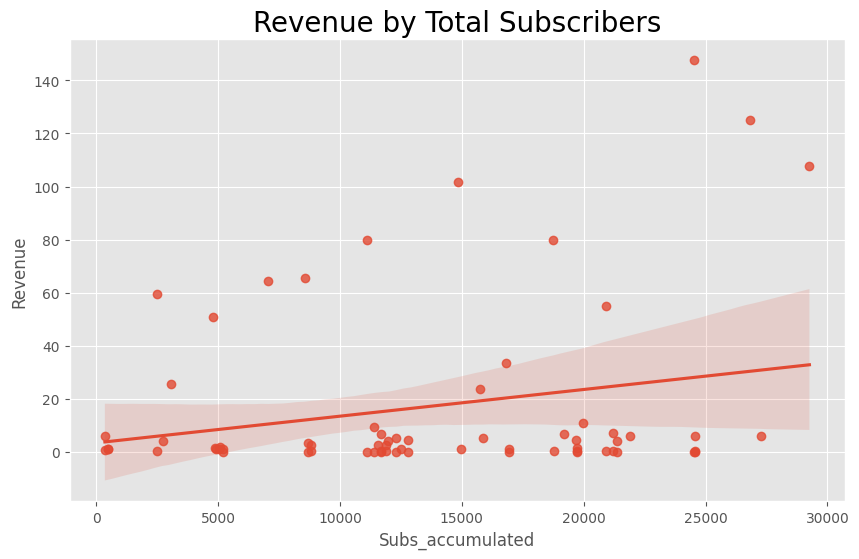

In [34]:

plt.figure(figsize=(10,6))
sns.regplot(data=df, x='Subs_accumulated', y='Revenue')
plt.title('Revenue by Total Subscribers', fontsize=20)
plt.show()
     

In [35]:
print(df[['Subs_accumulated','Revenue']])

    Subs_accumulated  Revenue
0                356    5.785
1                364    0.826
2                467    1.201
3                486    0.963
4               2483   59.635
..               ...      ...
62             24571    0.131
63             24572    0.000
64             26841  125.014
65             27264    6.017
66             29261  107.846

[67 rows x 2 columns]


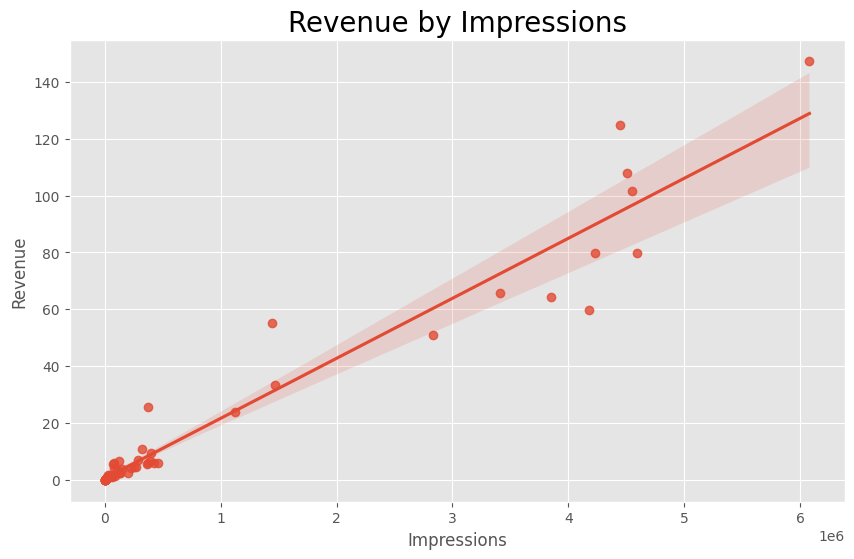

In [36]:
plt.figure(figsize=(10,6))
sns.regplot(data=df, x='Impressions', y='Revenue')
plt.title('Revenue by Impressions', fontsize=20)
plt.show()

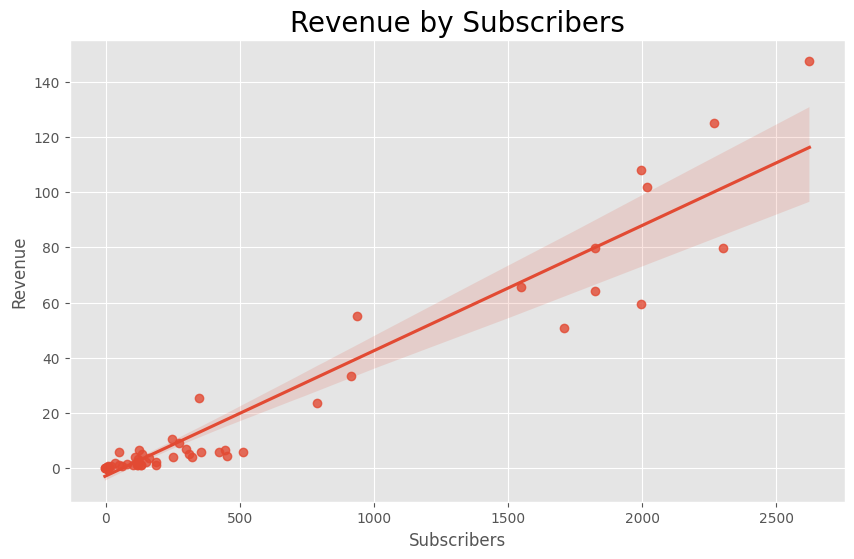

In [37]:
plt.figure(figsize=(10,6))
sns.regplot(data=df, x='Subscribers', y='Revenue')
plt.title('Revenue by Subscribers', fontsize=20)
plt.show()

Impressions vs Revenue is better fitting than Subs_accumulated vs Revenue

In [38]:
Video_pub = df.Videos_published.values.tolist()
Videos = []
count = 0
for v in Video_pub:
    count += v
    Videos.append(count)

In [39]:

df['Videos'] = Videos
df.head(2)

,Date,Average_views_per_viewer,Unique_viewers,Click_rate,Impressions,Comments,Shares,Dislikes,Like,Average_viewed,Videos_published,Subscribers,Views,Watch_hours,Average_view_sec,Revenue,Subs_accumulated,Videos
0,2021-01-15,1.5570,17558,4.88,424741,101,105,20,940,30.63,0.0,356,27337,1530.0084,201,5.785,356,0.0
1,2019-07-24,1.2616,1231,5.64,21688,1,4,1,31,27.86,0.0,8,1553,60.2926,139,0.826,364,0.0


In [40]:
df.Videos_published.value_counts()

Videos_published
0.0    62
1.0     5
Name: count, dtype: int64

In [41]:
df.Videos.value_counts()

Videos
2.0    42
0.0     7
4.0     7
5.0     6
1.0     3
3.0     2
Name: count, dtype: int64

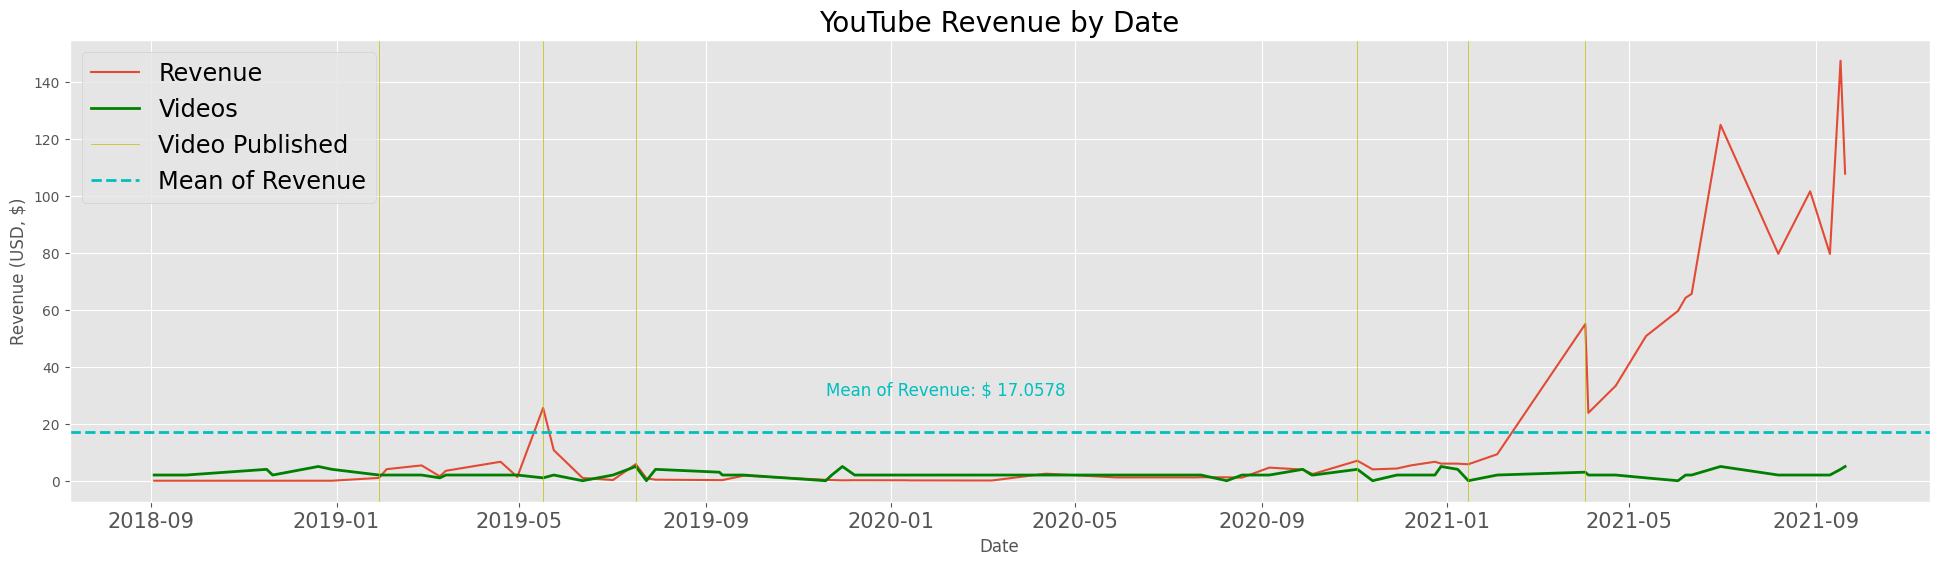

In [42]:

f, ax = plt.subplots(1, 1, figsize=(24, 6))

ax = sns.lineplot(data=df, x='Date', y='Revenue', label='Revenue', lw=1.5)
ax = sns.lineplot(data=df, x='Date', y='Videos', label='Videos', color='g', lw=2, linestyle='-')
plt.axvline(df.Date[0], color='y', label='Video Published', lw=0.5)

for i in range(1, len(df)):
    if df.Videos_published[i] == 1:
        plt.axvline(df.Date[i], color='y', lw=0.5)

plt.axhline(df.Revenue.mean(), color='c', linestyle='--', linewidth=2, label='Mean of Revenue')
plt.annotate('Mean of Revenue: $ {}'.format(round(df.Revenue.mean(),4)), 
             (df.Date[5], 30), 
             fontsize=12, 
             color='c')

plt.title('YouTube Revenue by Date', fontsize=20)
plt.ylabel('Revenue (USD, $)')
plt.xticks(fontsize=15)
ax.legend(fontsize='xx-large')
plt.show()

In [43]:

#df = df[(df['Date'] > '20200901')].reset_index(drop=True)
df

,Date,Average_views_per_viewer,Unique_viewers,Click_rate,Impressions,Comments,Shares,Dislikes,Like,Average_viewed,Videos_published,Subscribers,Views,Watch_hours,Average_view_sec,Revenue,Subs_accumulated,Videos
0,2021-01-15,1.5570,17558,4.88,424741,101,105,20,940,30.63,0.0,356,27337,1530.0084,201,5.785,356,0.0
1,2019-07-24,1.2616,1231,5.64,21688,1,4,1,31,27.86,0.0,8,1553,60.2926,139,0.826,364,0.0
2,2020-08-09,1.8000,2535,6.15,57690,27,30,11,232,25.98,0.0,103,4563,230.7383,182,1.201,467,0.0
3,2019-06-12,1.2996,1629,5.76,27800,9,3,0,64,26.28,0.0,19,2117,100.3671,170,0.963,486,0.0
4,2021-06-02,2.4762,93453,4.26,4175116,464,417,157,9126,33.26,0.0,1997,231404,17511.5046,272,59.635,2483,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,2019-11-30,1.3753,421,5.73,8078,1,0,1,4,21.04,0.0,1,579,16.5260,102,0.131,24571,5.0
63,2018-12-20,1.2857,49,10.19,540,1,0,0,3,20.56,0.0,1,63,1.6130,92,0.000,24572,5.0
64,2021-06-30,2.3033,106459,4.16,4449518,825,423,171,11819,38.56,0.0,2269,245204,21847.0122,320,125.014,26841,5.0
65,2020-12-28,1.6154,14702,4.83,373796,110,74,35,1106,30.22,0.0,423,23750,1414.7931,214,6.017,27264,5.0


# Check Variance Inflation Factor for Colinearity

In [44]:
from sklearn.linear_model import LinearRegression

def calculate_vif(df, features):    
    vif, tolerance = {}, {}
    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]
        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        # calculate tolerance
        tolerance[feature] = 1 - r2
        # calculate VIF
        vif[feature] = 1/(tolerance[feature])
    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})

In [45]:
cell_hover = {  # for row hover use  instead of 
    'selector': 'td:hover',
    'props': [('background-color', 'green')]
}

In [46]:
df.corr()['Revenue'].sort_values(ascending=False).reset_index().style.set_table_styles([cell_hover])

,index,Revenue
0,Revenue,1.000000
1,Watch_hours,0.980722
2,Like,0.978726
3,Unique_viewers,0.977583
4,Views,0.976164
5,Impressions,0.971108
6,Subscribers,0.959061
7,Shares,0.957932
8,Dislikes,0.953578
9,Comments,0.909540


In [47]:
df.corr()['Revenue'].sort_values(ascending=False).reset_index()['index'][1:14].values

array(['Watch_hours', 'Like', 'Unique_viewers', 'Views', 'Impressions',
       'Subscribers', 'Shares', 'Dislikes', 'Comments',
       'Average_views_per_viewer', 'Average_view_sec', 'Average_viewed',
       'Date'], dtype=object)

Checking VIF (if input columns are highly related with each other)


In [48]:
features_chosen=[
                #  'Watch_hours', 
                #  'Unique_viewers', 
                #  'Views', 
                #  'Likes', 
                #  'Dislikes',
                #  'Impressions', 
                 'Subs_accumulated',
                #  'Subscribers', 
                 'Comments', 
                 'Shares',
                #  'Videos',
                 'Average_view_sec', 
                #  'Average_views_per_viewer', 
                 'Average_viewed'
                 ]
calculate_vif(df.iloc[:,1:], features=features_chosen).style.apply(lambda x: ['background:green' if v < 0.2 else '' for v in x], subset=['VIF'])


,VIF,Tolerance
Subs_accumulated,1.092953,0.914952
Comments,7.084898,0.141145
Shares,6.102898,0.163857
Average_view_sec,3.941534,0.253708
Average_viewed,2.087289,0.479090


VIF > 5 suggests that they are feature is highly realted 


In [49]:
cols_remove = [
                    'Date',
                # 'Watch_hours', 
                #  'Unique_viewers', 
                #  'Views', 
                 'Dislikes',
                # 'Impressions', 
                # 'Subscribers', 
                 'Comments', 
                 'Shares',
                 'Videos',
                 'Average_view_sec', 
                 'Average_views_per_viewer', 
                 'Average_viewed',
                 'Videos_published',
                 'Click_rate', 
                 'Subs_accumulated',
                 ]


df_new = df.copy()
df_new = df_new.drop(cols_remove, axis=1)
print('New Data Shape: ', df_new.shape)
df_new.head(2)

New Data Shape:  (67, 7)


,Unique_viewers,Impressions,Like,Subscribers,Views,Watch_hours,Revenue
0,17558,424741,940,356,27337,1530.0084,5.785
1,1231,21688,31,8,1553,60.2926,0.826


In [50]:
df_new.corr()['Revenue']

Unique_viewers    0.977583
Impressions       0.971108
Like              0.978726
Subscribers       0.959061
Views             0.976164
Watch_hours       0.980722
Revenue           1.000000
Name: Revenue, dtype: float64

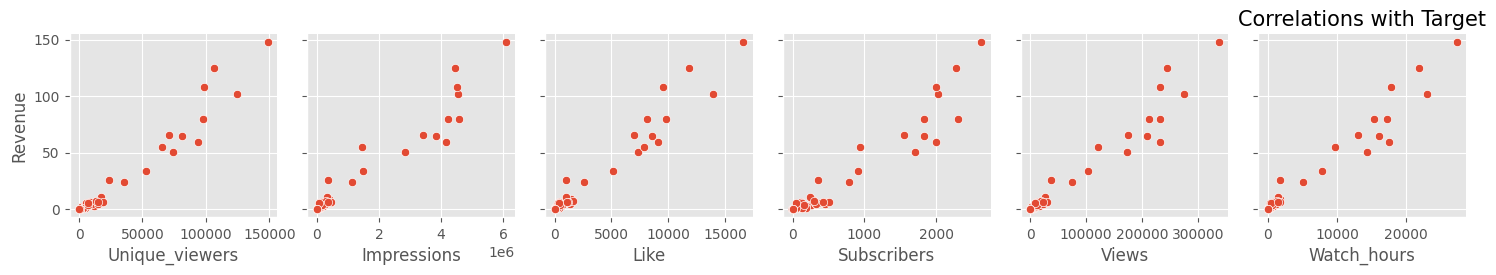

In [51]:
sns.pairplot(df_new, x_vars=df_new.columns.drop('Revenue'), y_vars=['Revenue'])
plt.title('Correlations with Target', fontsize=15)
plt.show()

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
train = df_new[:int(len(df_new)*0.8)]
test = df_new[int(len(df_new)*0.8):]
train.shape, test.shape

((53, 7), (14, 7))

In [54]:
target = 'Revenue'

X_train = train.drop(target, axis=1)
y_train = train[target]
X_test = test.drop(target, axis=1)
y_test = test[target]

X_train.shape, y_train.shape

((53, 6), (53,))

**F-statistic & P-Values**

In [55]:
from sklearn.feature_selection import f_regression

pvalue_table = pd.DataFrame(f_regression(X_train, y_train), columns=X_train.columns).T.rename(columns={0:'F_statistic', 1:'p_values'})
pvalue_table.style.apply(lambda x: ["background: green" if v < 0.05 else "" for v in x], axis = 1)
     

,F_statistic,p_values
Unique_viewers,2278.536367,0.000000
Impressions,840.368968,0.000000
Like,1440.896979,0.000000
Subscribers,649.464938,0.000000
Views,1580.428652,0.000000
Watch_hours,1358.989643,0.000000


**Higher F statis and lower p value suggests that null hypothesis that the predictors have no effect** 

**BaseLine Model**

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

**R^2 values range from 0 to 1. A value of 1 indicates a perfect fit**

In [57]:
def evaluate(title, y, y_):
    mae = mean_absolute_error(y, y_)
    rmse = mean_squared_error(y, y_)**0.5
    r2 = r2_score(y, y_)
    print('*{} Result*'.format(title))
    print('='*50)
    print('MAE Score: $', mae)
    print('RMSE Score: $', rmse)
    print('R2 Score: ', r2)
    print()

# Model Selection


**Linear Regression**

In [58]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


In [59]:
pipe_lin = make_pipeline(
    StandardScaler(),
    LinearRegression(n_jobs=-1)
)

pipe_lin.fit(X_train, y_train)
y_pred = pipe_lin.predict(X_test)
evaluate('Linear Regression', y_test, y_pred)

*Linear Regression Result*
MAE Score: $ 7.636502177901773
RMSE Score: $ 15.917087444837351
R2 Score:  0.9046368895375074



**Log Transformed Linear Regression**

In [60]:
from sklearn.compose import TransformedTargetRegressor

In [61]:
tt_lin = TransformedTargetRegressor(regressor=pipe_lin,
                                func=np.log1p, inverse_func=np.expm1)

tt_lin.fit(X_train, y_train)
y_pred = tt_lin.predict(X_test)
evaluate('Log Transformed Linear Regression', y_test, y_pred)

*Log Transformed Linear Regression Result*
MAE Score: $ 14.077523136342112
RMSE Score: $ 33.90205856570781
R2 Score:  0.5673812449590006



**Ridge**

In [62]:
pipe_ridge = make_pipeline(
    StandardScaler(),
    RidgeCV(alphas=np.arange(100, 105, 0.01), cv=5)
)

tt_ridge = TransformedTargetRegressor(regressor=pipe_ridge,
                                func=np.log1p, inverse_func=np.expm1)

tt_ridge.fit(X_train, y_train)
y_pred = tt_ridge.predict(X_test)
print('Best alpha: ', tt_ridge.regressor_.named_steps['ridgecv'].alpha_)
evaluate('Log Transformed Ridge', y_test, y_pred)

Best alpha:  100.0
*Log Transformed Ridge Result*
MAE Score: $ 15.573562671869277
RMSE Score: $ 31.722359626016534
R2 Score:  0.621222500980801



**Lasso**

In [63]:
pipe_lasso = make_pipeline(
    StandardScaler(),
    LassoCV(alphas=np.arange(0, 0.2, 0.001), cv=5, random_state=33)
)

tt_lasso = TransformedTargetRegressor(regressor=pipe_lasso,
                                func=np.log1p, inverse_func=np.expm1)

tt_lasso.fit(X_train, y_train)
y_pred = tt_lasso.predict(X_test)
print('Best alpha: ', tt_lasso.regressor_.named_steps['lassocv'].alpha_)
evaluate('Log Transformed Lasso', y_test, y_pred)

Best alpha:  0.0
*Log Transformed Lasso Result*
MAE Score: $ 13.843656710831336
RMSE Score: $ 30.01145792174713
R2 Score:  0.6609783833210323



**ElasticNet**

In [64]:
from sklearn.linear_model import ElasticNetCV

In [65]:
pipe_elnet = make_pipeline(
    StandardScaler(),
    ElasticNetCV(n_jobs=-1, cv=5, random_state=33)
)

tt_elnet = TransformedTargetRegressor(regressor=pipe_elnet,
                                func=np.log1p, inverse_func=np.expm1)

tt_elnet.fit(X_train, y_train)
y_pred = tt_elnet.predict(X_test)
evaluate('Log Transformed ElasticNet', y_test, y_pred)

*Log Transformed ElasticNet Result*
MAE Score: $ 16.050100955573846
RMSE Score: $ 37.28969086368449
R2 Score:  0.47660355360185824



**RandomForest Regressor**

In [66]:
from sklearn.ensemble import RandomForestRegressor


In [67]:
pipe_rfreg = make_pipeline(
    StandardScaler(),
    RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=33)
)

tt_rfreg = TransformedTargetRegressor(regressor=pipe_rfreg,
                                func=np.log1p, inverse_func=np.expm1)

tt_rfreg.fit(X_train, y_train)
y_pred = tt_rfreg.predict(X_test)
evaluate('Log Transformed RandomForest Regressor', y_test, y_pred)

*Log Transformed RandomForest Regressor Result*
MAE Score: $ 9.767949521015035
RMSE Score: $ 20.492586562830443
R2 Score:  0.8419309802127528



**XGB Regressor**

In [68]:
from xgboost import XGBRegressor

In [69]:
pipe_xgb = make_pipeline(
    StandardScaler(),
    XGBRegressor(learning_rate=0.1,
                  n_estimators=500,
                  n_jobs=-1,
                  random_state=33)
)

tt_xgb = TransformedTargetRegressor(regressor=pipe_xgb,
                                func=np.log1p, inverse_func=np.expm1)

tt_xgb.fit(X_train, y_train)
y_pred = tt_xgb.predict(X_test)
evaluate('Log Transformed XGB Regressor', y_test, y_pred)

*Log Transformed XGB Regressor Result*
MAE Score: $ 10.195344327274727
RMSE Score: $ 20.35342770757483
R2 Score:  0.8440704873316911



**Light Gradient Boost Machine Regressor**

In [70]:
from lightgbm import LGBMRegressor

In [71]:
pipe_lgb = make_pipeline(
    StandardScaler(),
    LGBMRegressor(learning_rate=0.1,
                  n_estimators=500,
                  n_jobs=-1,
                  random_state=33)
)

tt_lgb = TransformedTargetRegressor(regressor=pipe_lgb,
                                func=np.log1p, inverse_func=np.expm1)

tt_lgb.fit(X_train, y_train)
y_pred = tt_lgb.predict(X_test)
evaluate('Log Transformed Light GBM Regressor', y_test, y_pred)

*Log Transformed Light GBM Regressor Result*
MAE Score: $ 26.202192236300316
RMSE Score: $ 49.97344729085701
R2 Score:  0.05999141068250158



**Model Combined**

 So far best models are simple linear regresssion and Random Forest 

In [72]:
y_pred = pipe_lin.predict(X_test)*0.4 +tt_rfreg.predict(X_test)*0.6
evaluate('[Random forest + Simple linear regression]', y_test, y_pred)

*[Random forest + Simple linear regression] Result*
MAE Score: $ 8.73121796657112
RMSE Score: $ 18.166553728258943
R2 Score:  0.8757780624425496



 So far best models are simple linear regresssion and Random Forest and XGB

In [73]:
y_pred = pipe_lin.predict(X_test)*0.2 +tt_rfreg.predict(X_test)*0.6 + tt_xgb.predict(X_test)*0.2
evaluate('[Random forest + Simple linear regression + XGB]', y_test, y_pred)

*[Random forest + Simple linear regression + XGB] Result*
MAE Score: $ 9.31241169006602
RMSE Score: $ 19.229131581032476
R2 Score:  0.8608213735631753



# Testing on sheet2

In [74]:
dfTest = pd.read_csv('/kaggle/input/youtube-revenue-prediction/sheet2.csv')
dfTest.head()

,id,a,b,c,d,e,f,g,h,i,...,m,n,o,p,q,r,s,t,u,v
0,1,12-10-2020,1.6106,6683.9900,4150,5.86,82477,82482.86,27,41,...,46,147,242,27.96,0.0,0.0,101,6684,361.8757,00:03:14
1,2,04-02-2021,1.6255,24065.5275,14805,4.94,360696,360700.94,83,81,...,103,334,1048,31.87,0.0,0.0,231,24066,1472.3777,00:03:40
2,3,08-10-2019,1.5132,1091.0172,721,6.39,13192,13198.39,0,3,...,4,15,13,25.78,0.0,0.0,11,1091,39.3224,00:02:09
3,4,01-12-2019,1.4206,608.0168,428,5.97,8810,8815.97,2,0,...,5,14,9,26.03,0.0,0.0,9,608,21.0277,00:02:04
4,5,04-09-2020,1.6092,15979.3560,9930,6.89,182250,182256.89,78,55,...,69,346,997,28.86,0.0,0.0,277,15979,854.6027,00:03:12


In [75]:
col_map ={'a':'Date',
          'b':'Average_views_per_viewer',
          'c':'Engagement_score',
          'g':'Impression_score',
          'd':'Unique_viewers',
          'p':'Average_viewed',
          'i':'Shares',
          'j':'Likes_vs_dislike',
          'k':'Content_viewability',
          'f':'Impressions',
          'l':'Dislikes',
          'm':'Subscribers_lost',
          'n':'Subscribers_gained',
          'o':'Like',
          't':'Views',
          'r':'Videos_added',
          'q':'Videos_published', 
          's':'Subscribers',
          'e':'Click_rate',
          'h':'Comments',
          'u':'Watch_hours',
          'v':'Average_view_sec',
          'target':'Revenue'}
dfTest = dfTest.rename(columns=col_map)
dfTest.head()


,id,Date,Average_views_per_viewer,Engagement_score,Unique_viewers,Click_rate,Impressions,Impression_score,Comments,Shares,...,Subscribers_lost,Subscribers_gained,Like,Average_viewed,Videos_published,Videos_added,Subscribers,Views,Watch_hours,Average_view_sec
0,1,12-10-2020,1.6106,6683.9900,4150,5.86,82477,82482.86,27,41,...,46,147,242,27.96,0.0,0.0,101,6684,361.8757,00:03:14
1,2,04-02-2021,1.6255,24065.5275,14805,4.94,360696,360700.94,83,81,...,103,334,1048,31.87,0.0,0.0,231,24066,1472.3777,00:03:40
2,3,08-10-2019,1.5132,1091.0172,721,6.39,13192,13198.39,0,3,...,4,15,13,25.78,0.0,0.0,11,1091,39.3224,00:02:09
3,4,01-12-2019,1.4206,608.0168,428,5.97,8810,8815.97,2,0,...,5,14,9,26.03,0.0,0.0,9,608,21.0277,00:02:04
4,5,04-09-2020,1.6092,15979.3560,9930,6.89,182250,182256.89,78,55,...,69,346,997,28.86,0.0,0.0,277,15979,854.6027,00:03:12


In [76]:
dfTest = dfTest.drop(['Engagement_score', 
              'Impression_score', 
              'Subscribers_lost',
              'Subscribers_gained',
              'Videos_added',
              'id', 
              'Likes_vs_dislike', 
              'Content_viewability',
             ], axis=1)

In [77]:
dfTest.shape
dfTest.head(2)

,Date,Average_views_per_viewer,Unique_viewers,Click_rate,Impressions,Comments,Shares,Dislikes,Like,Average_viewed,Videos_published,Subscribers,Views,Watch_hours,Average_view_sec
0,12-10-2020,1.6106,4150,5.86,82477,27,41,8,242,27.96,0.0,101,6684,361.8757,00:03:14
1,04-02-2021,1.6255,14805,4.94,360696,83,81,20,1048,31.87,0.0,231,24066,1472.3777,00:03:40


**EDA on sheet2**

In [78]:
dfTest.select_dtypes(include=('object')).head(2)

,Date,Average_view_sec
0,12-10-2020,00:03:14
1,04-02-2021,00:03:40


In [79]:
cols_remove = [
                    'Date',
                # 'Watch_hours', 
                #  'Unique_viewers', 
                #  'Views', 
                 'Dislikes',
                # 'Impressions', 
                # 'Subscribers', 
                 'Comments', 
                 'Shares',
                 #'Videos',
                 'Average_view_sec', 
                 'Average_views_per_viewer', 
                 'Average_viewed',
                 'Videos_published',
                 'Click_rate', 
                 #'Subs_accumulated',
                 ]
dfTest = dfTest.drop(cols_remove, axis=1)
print('New Data Shape: ', dfTest.shape)
dfTest.head(2)

New Data Shape:  (1064, 6)


,Unique_viewers,Impressions,Like,Subscribers,Views,Watch_hours
0,4150,82477,242,101,6684,361.8757
1,14805,360696,1048,231,24066,1472.3777


In [80]:
train = df_new
test = dfTest
train.shape, test.shape

((67, 7), (1064, 6))

In [81]:
target = 'Revenue'

X_train = train.drop(target, axis=1)
y_train = train[target]
X_test = test

X_train.shape, y_train.shape, X_test.shape

((67, 6), (67,), (1064, 6))

**Training data on entire sheet 1**

In [82]:
pipe_lin.fit(X_train, y_train)
tt_rfreg.fit(X_train, y_train)
tt_xgb.fit(X_train, y_train)

TransformedTargetRegressor(func=<ufunc 'log1p'>, inverse_func=<ufunc 'expm1'>,
                           regressor=Pipeline(steps=[('standardscaler',
                                                      StandardScaler()),
                                                     ('xgbregressor',
                                                      XGBRegressor(base_score=None,
                                                                   booster=None,
                                                                   callbacks=None,
                                                                   colsample_bylevel=None,
                                                                   colsample_bynode=None,
                                                                   colsample_bytree=None,
                                                                   device=None,
                                                                   early_stopping_rounds=None,
                                                                   enable_categorical=False,
                                                                   eval_metr...
                                                                   gamma=None,
                                                                   grow_policy=None,
                                                                   importance_type=None,
                                                                   interaction_constraints=None,
                                                                   learning_rate=0.1,
                                                                   max_bin=None,
                                                                   max_cat_threshold=None,
                                                                   max_cat_to_onehot=None,
                                                                   max_delta_step=None,
                                                                   max_depth=None,
                                                                   max_leaves=None,
                                                                   min_child_weight=None,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   multi_strategy=None,
                                                                   n_estimators=500,
                                                                   n_jobs=-1,
                                                                   num_parallel_tree=None,
                                                                   random_state=33, ...))]))

**Prediction on sheet2**

In [83]:
y_pred = pipe_lin.predict(X_test)*0.2 +tt_rfreg.predict(X_test)*0.6 + tt_xgb.predict(X_test)*0.2

In [84]:
y_pred

array([1.63081206, 8.64662186, 0.38458811, ..., 7.23291316, 1.34778493,
       2.92624843])